url: https://towardsdatascience.com/crime-rate-prediction-using-facebook-prophet-5348e21273d

In [3]:
import pandas as pd
import glob
df_list = []
path = '../../data'
all_files = glob.glob(path+'/Chicago*.csv')
print(len(all_files))
for file in sorted(all_files):
    print('reading file {}'.format(file))
    df_list.append(pd.read_csv(file,error_bad_lines=False))
df = pd.concat(df_list)
df

4
reading file ../../data/Chicago_Crimes_2001_to_2004.csv


b'Skipping line 1513591: expected 23 fields, saw 24\n'
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


reading file ../../data/Chicago_Crimes_2005_to_2007.csv


b'Skipping line 533719: expected 23 fields, saw 24\n'


reading file ../../data/Chicago_Crimes_2008_to_2011.csv


b'Skipping line 1149094: expected 23 fields, saw 41\n'


reading file ../../data/Chicago_Crimes_2012_to_2017.csv


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1.8883e+06,2016.0,05/10/2016 03:56:50 PM,41.8492,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1.85618e+06,2016.0,05/10/2016 03:56:50 PM,41.7607,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1.86281e+06,2016.0,05/10/2016 03:56:50 PM,41.7792,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1.85073e+06,2016.0,05/10/2016 03:56:50 PM,41.7453,-87.552773,"(41.745251975, -87.552773464)"


In [4]:
df.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'X Coordinate',  'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area','Location', 'District', 'Latitude', 'Longitude'],
axis = 1, inplace=True)

In [5]:
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)
df.drop('Date', inplace = True, axis = 1)


In [6]:
df

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


Text(0, 0.5, 'Num of crimes')

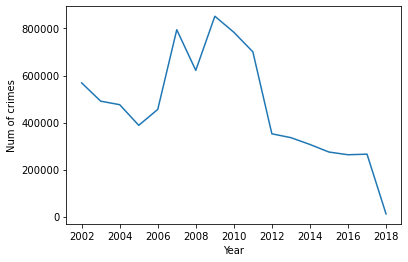

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.resample('Y').size())
plt.xlabel('Year')
plt.ylabel('Num of crimes')


Text(0, 0.5, 'Num of crimes')

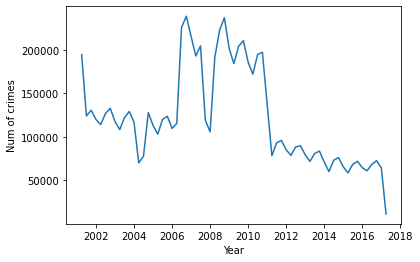

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.resample('Q').size())
plt.xlabel('Year')
plt.ylabel('Num of crimes')

Text(0, 0.5, 'Num of crimes')

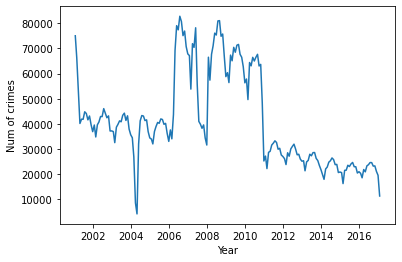

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.resample('M').size())
plt.xlabel('Year')
plt.ylabel('Num of crimes')

In [11]:
df_m = df.resample('M').size()

In [15]:
df_m = df_m.reset_index()

In [18]:
df_m

,Date,Monthly Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [17]:
df_m.columns = ['Date', 'Monthly Crime Count']

In [20]:
df_m_final = df_m.rename(columns = {'Date': 'ds', 'Monthly Crime Count': 'y'})

In [21]:
df_m_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [24]:
from prophet import Prophet

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.add_seasonality(name='quarterly', period=91.5, fourier_order=10)
m.fit(df_m_final)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods = 24, freq = 'M')
pred = m.predict(future)

In [29]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,quarterly,quarterly_lower,quarterly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,69724.226846,56786.280265,98267.175785,69724.226846,69724.226846,6894.925810,6894.925810,6894.925810,18860.569188,18860.569188,18860.569188,-11965.643378,-11965.643378,-11965.643378,0.0,0.0,0.0,76619.152656
1,2001-02-28,69498.114052,28971.935070,71293.287172,69498.114052,69498.114052,-18948.505772,-18948.505772,-18948.505772,-11025.936687,-11025.936687,-11025.936687,-7922.569085,-7922.569085,-7922.569085,0.0,0.0,0.0,50549.608280
2,2001-03-31,69247.774887,22785.176723,65210.993284,69247.774887,69247.774887,-25614.355758,-25614.355758,-25614.355758,-16196.983666,-16196.983666,-16196.983666,-9417.372092,-9417.372092,-9417.372092,0.0,0.0,0.0,43633.419129
3,2001-04-30,69005.511180,26423.759566,69327.721927,69005.511180,69005.511180,-22059.639337,-22059.639337,-22059.639337,-11025.936687,-11025.936687,-11025.936687,-11033.702650,-11033.702650,-11033.702650,0.0,0.0,0.0,46945.871843
4,2001-05-31,68755.172015,27471.285969,68093.605865,68755.172015,68755.172015,-21680.622116,-21680.622116,-21680.622116,-16196.983666,-16196.983666,-16196.983666,-5483.638450,-5483.638450,-5483.638450,0.0,0.0,0.0,47074.549899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2018-09-30,17629.400699,-12645.897820,28322.176505,17629.399195,17629.401986,-10327.214261,-10327.214261,-10327.214261,-13808.651935,-13808.651935,-13808.651935,3481.437674,3481.437674,3481.437674,0.0,0.0,0.0,7302.186438
213,2018-10-31,17379.061046,-19635.157781,23387.597909,17379.059425,17379.062462,-15956.278353,-15956.278353,-15956.278353,-6445.808553,-6445.808553,-6445.808553,-9510.469800,-9510.469800,-9510.469800,0.0,0.0,0.0,1422.782692
214,2018-11-30,17136.796865,-26412.584198,18311.077576,17136.795144,17136.798394,-21906.883856,-21906.883856,-21906.883856,-13808.651935,-13808.651935,-13808.651935,-8098.231920,-8098.231920,-8098.231920,0.0,0.0,0.0,-4770.086991
215,2018-12-31,16886.457211,-9945.618635,34701.114553,16886.455377,16886.458852,-6532.496718,-6532.496718,-6532.496718,-6445.808553,-6445.808553,-6445.808553,-86.688165,-86.688165,-86.688165,0.0,0.0,0.0,10353.960493


In [28]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
212,2018-09-30,7302.186438,-12645.897820,28322.176505
213,2018-10-31,1422.782692,-19635.157781,23387.597909
214,2018-11-30,-4770.086991,-26412.584198,18311.077576
215,2018-12-31,10353.960493,-9945.618635,34701.114553
216,2019-01-31,8041.028562,-11313.481675,28663.342530


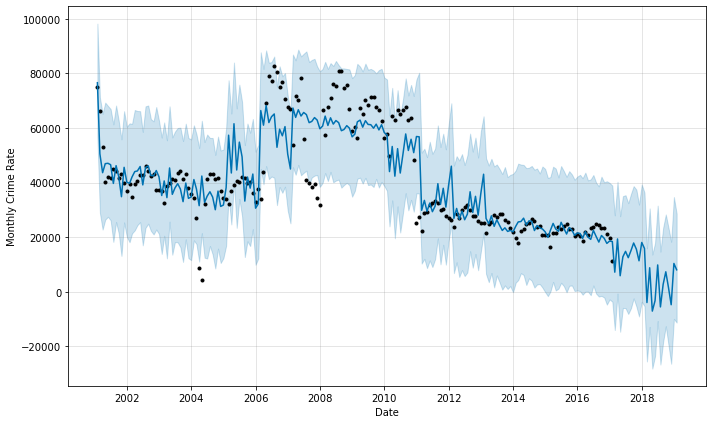

In [30]:
fig = m.plot(pred,xlabel='Date',ylabel='Monthly Crime Rate')

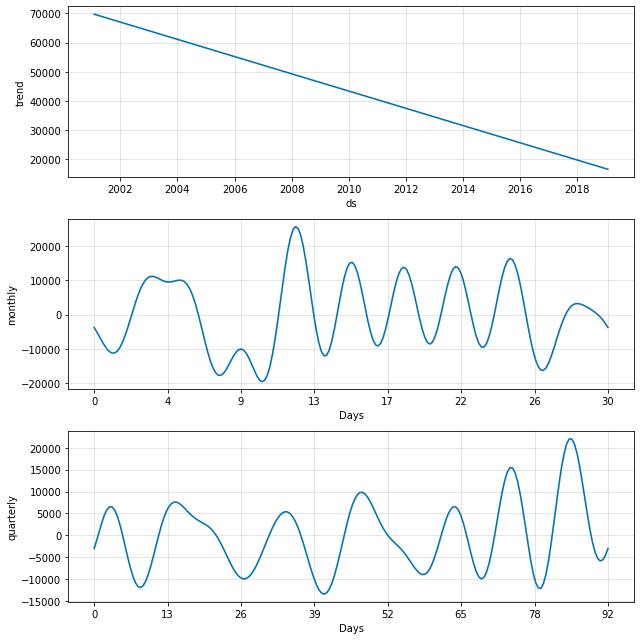

In [31]:
fig = m.plot_components(pred)